<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/pyintro4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python入門(4)

- pandasを用いた統計処理
- 科学技術計算ライブラリ scipy

このテキストは「谷合廣紀著: Pythonで理解する統計解析の基礎」を参考にしています。

In [2]:
# 必要なimport
import numpy as np
import pandas as pd

In [3]:
# notebookの設定
%load_ext google.colab.data_table
%precision 3
pd.set_option('precision', 3)

# データの種類

統計処理を行いたいデータはpandasを利用してDataFrameとよばれる表形式で読み込む。表の列を変数とよぶ。変数には**質的変数**と**量的変数**がある。

質的変数はデータに対してカテゴリとして与えられた値で、性別やアンケートによる満足度の回答などが例として挙げられる。質的変数はさらに名義尺度と順序尺度に分類できる。名義尺度は順序がつけられないカテゴリ、順序尺度は順序が付いて大小比較が行えるカテゴリである。

量的変数は量を表現するものである。量的変数はさらに間隔尺度と比例尺度に分類できる。間隔尺度は差に意味があるもので、西暦の年数・温度など。比例尺度は0を基点として、差や比に意味があるもので、人数・長さなどである。なお量的変数は、年数・人数などのとびとびの値を取る離散型、温度・長さなどの実数値を取る連続型という分類もある。


| 尺度 | 例 | 大小比較 | 差 | 比 |
| --- | --- | --- | --- | --- | 
| 名義尺度 | 学生番号 | × | × | × |
| 順序尺度 | 成績順位 | ○ | × | × |
| 間隔尺度 | 温度 | ○ | ○ | × |
| 比例尺度 | 距離 | ○ | ○ | ○ |


# 1次元データ

試験の10人分の点数を乱数で生成し、それぞれに氏名の情報を付け加えたDataFrameを作成。

In [5]:
scores = np.random.randint(0,100,10)
scores

array([65, 17, 40, 79, 52, 26, 81,  1, 49, 86])

In [6]:
scores_df = pd.DataFrame({'Score':scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='name'))
scores_df

,Score
name,
A,65
B,17
C,40
D,79
E,52
F,26
G,81
H,1
I,49


## データの中心の指標

データの中心的傾向を示す値を**代表値**とよぶ。データの性質に基づいて、平均値・中央値・最頻値などを使い分ける必要がある。

### 平均値

$$
\mu = \frac{1}{n}\sum_{i=1}^n x_i
$$

ndarrayの場合は、np.mean関数を用いる。

In [7]:
np.mean(scores)

49.600

DataFrameの場合は、meanメソッドを用いる。戻り値がSeriesなので、値のみが必要な場合は、その0番目の要素を取り出す。

In [8]:
scores_df.mean()[0]

49.600

### 中央値

データを大きさの順に並べたときに中央に位置する値。平均値と比較して外れ値に強い。データの個数が偶数個の場合は、中央の2つの値の平均値を中央値とする。

In [9]:
np.median(scores)

50.500

In [10]:
scores_df.median()[0]

50.500

### 最頻値

主として質的データの代表値を求める場合に用いる。DataFrameやSeriesのmodeメソッドで求める。量的データの場合は、度数分布を求めてから最頻値の範囲を求める。

In [11]:
pd.Series(['m', 'f', 'f', 'f','m', 'f']).mode()[0]

'f'

## データのばらつきの指標

### 分散と標準偏差

個々のデータと平均値との差を**偏差**とよぶ。この偏差の大きさでデータのばらつきを表したいが、単純に足し合わせると平均よりも大きいデータの偏差と小さいデータの偏差が打ち消し合って0になってしまう。そこで、偏差を2乗して正の値として足し合わせ、データの個数で割ったものを**分散**$\sigma^2$とよぶ。そして、分散の平方根を**標準偏差**$\sigma$とよぶ。

$$
\sigma^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2
$$

$$
\sigma = \sqrt{\sigma^2}
$$

正確には、分散には**標本分散**と**不偏分散**とがある。偏差の2乗和をデータの個数で割るものが標本分散、「データの個数-1」で割るものが不偏分散である。標本分散と不偏分散の違いは、[高校数学の美しい物語「不偏標本分散の意味とn-1で割ることの証明」](https://manabitimes.jp/math/1035)を参照。

numpyのvar関数は標本分散、DataFrameやSeriesのvarメソッドは不偏分散を計算する。

In [12]:
np.var(scores)

749.240

In [13]:
# 不偏分散を計算。標本分散を求めたいときはvarメソッドの引数でddof=0とする
scores_df.var()[0]

832.489

標準偏差の計算は、numpyではstd関数、DataFrameやSeriesではstdメソッドを用いる。

In [14]:
np.std(scores)

27.372

In [15]:
scores_df.std()[0]

28.853

### 範囲と四分位範囲

データの広がりは、最大値と最小値によって示すことができるが、この場合は外れ値の影響が大きい。おおよそのデータの広がりを把握する方法として、データの下位25%、50%、75%に位置する値をそれぞれ第1四分位点Q1、第2四分位点Q2、第3四分位点Q3とよび、$Q3-Q1$を四分位範囲IQRとよぶ。第2四分位点は中央値であるので、IQRは中央値に対するばらつきの程度を表す値と解釈することができる。

DataFrameやSeriesにはdescribeメソッドがあり、これまで説明した指標をすべて計算して表示することができる。

In [16]:
scores_df.describe()

,Score
count,10.000
mean,49.600
std,28.853
min,1.000
25%,29.500
50%,50.500
75%,75.500
max,86.000


## データの正規化

データの個々の値の意味は、平均値や分散によって異なる。たとえば平均点が20点のテストで70点を取ったときと、平均点が90点のテストで70点を取ったときでは、その意味が異なる。異なった環境のデータを比較するときは、それぞれの環境での相対的な位置関係が把握できるとよい。データに対して平均や分散の影響を取り除いて統一的な指標に変換することを**正規化**とよぶ。

### 標準化

正規化のなかでも、データを平均0、分散1に変換することを**標準化**とよぶ。標準化は個々のデータから平均値を引き、標準偏差で割る処理を行う。標準化されたデータをZスコアとよぶ。

$$
z_i = \frac{x_i - \mu}{\sigma}
$$

In [17]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([ 0.563, -1.191, -0.351,  1.074,  0.088, -0.862,  1.147, -1.776,
       -0.022,  1.33 ])

In [18]:
# 平均0、分散1（=標準偏差1）を確認
np.mean(z), np.std(z)

(-0.000, 1.000)

### 偏差値

偏差値は、平均50、標準偏差10となるように正規化された値である。

$$
d = 50 + 10 \times \frac{x_i - \mu}{\sigma}
$$


In [19]:
d = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
d

array([55.626, 38.09 , 46.493, 60.741, 50.877, 41.378, 61.471, 32.245,
       49.781, 63.298])

## 1次元データの可視化

### 度数分布

量的データにおいて、どのぐらいの値がどのぐらいの頻度で出現するのかを分析するには、**度数分布表**を作成する。これは、データの値をいくつかの区間に分けて、各区間に含まれるデータの数を表の形式で示したものである。区間のことを階級、各階級に属しているデータ数を度数とよぶ。度数はnp.histgramを用い、階級数を引数binsで、範囲を引数rangeで指定することで求めることができる。



In [20]:
np.histogram(scores, bins=10, range=(0,100))

(array([1, 1, 1, 0, 2, 1, 1, 1, 2, 0]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

度数を棒グラフで表したものを**ヒストグラム**とよぶ。ヒストグラムの表示はDataFrameやSeriesのhistメソッドを用いる。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1871d7a50>]],
      dtype=object)

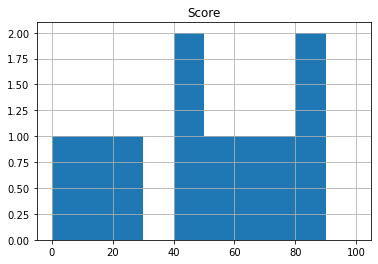

In [21]:
scores_df.hist(bins=10, range=(0,100))

### 四分位範囲

四分位範囲は箱ひげ図で可視化する。箱の下辺がQ1、上辺がQ3、横線がQ2(=中央値)を示し、上下に延びたひげの端はQ1,Q3からそれぞれ$1.5 \times IQR$ 離れた値を示す。一般にこのひげの範囲の外側の値を外れ値として扱う。なお、データの最大値・最小値がこのひげの範囲内に収まる場合は、ひげの上下端がそれぞれ最大値・最小値を示す。

箱ひげ図の表示はDataFrameのboxplotメソッドを用いる。

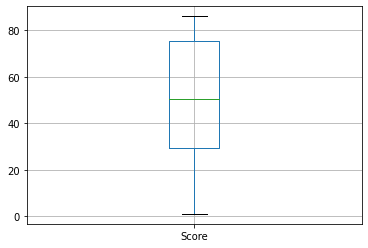

In [22]:
scores_df.boxplot()

# 2次元データ

2次元データを用いて、その関係性を分析する。

In [23]:
en_scores = np.random.randint(0,100,10)
ma_scores = np.random.randint(0,100,10)
scores_df = pd.DataFrame({'Eng':en_scores, 'Math':ma_scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='name'))
scores_df

,Eng,Math
name,,
A,99,95
B,36,82
C,82,48
D,99,89
E,1,38
F,87,14
G,94,46
H,99,92
I,62,18


## 2つのデータの関係性の指標

2つのデータの相関を分析する。

ここでは説明の都合上、まず可視化の方法を示す。2次元データの可視化には散布図を用いることができる。

散布図はDataFrameのscatterメソッドで表示することができる。

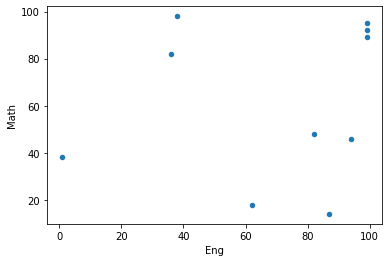

In [24]:
scores_df.plot.scatter(x='Eng', y='Math')

In [25]:
scores_df.describe()

,Eng,Math
count,10.000,10.000
mean,69.700,62.000
std,34.215,32.799
min,1.000,14.000
25%,44.000,40.000
50%,84.500,65.000
75%,97.750,91.250
max,99.000,98.000


この散布図を、それぞれの軸の平均値を表す直線を用いて4分割したとき、右上と左下に入るデータは英語と数学の点数が同じ傾向を示すことを支持しており、左上と右下に入るデータは逆の傾向を支持している。つまりそれぞれの軸に対して平均値との差をとって掛け合わせたものが正になれば、同じ傾向を支持する値となり、負になれば逆の傾向を支持する値となる。それらを全体として足し合わせれば、データ全体が英語が高ければ数学も高いという傾向（正の相関）を示すのか、英語が高ければ数学が低いという傾向（負の相関）を示すのか、あるいはそれらは無関係（無相関）であるのかが判別できる。

従って、変数xと変数yの**共分散**$\sigma_{xy}$は以下の式で定義される。

$$
\sigma_{xy} = \frac{1}{n}\sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)
$$

これらの変数x,yを縦横に配置してそれぞれの共分散を表したものが**共分散行列**である。なお、同じ変数の共分散は分散となる。

$$
\Sigma = 
\begin{pmatrix}
\sigma_x^2 & \sigma_{xy} \\
\sigma_{xy} & \sigma_y^2 \\
\end{pmatrix}
$$

共分散行列はnp.covで求めることができる。

In [26]:
np.cov(en_scores, ma_scores, ddof=0)

array([[1053.61,  141.8 ],
       [ 141.8 ,  968.2 ]])

それぞれの軸を標準化したときに得られる共分散が相関係数である。相関係数は-1から1の値をとる。

相関行列はnp.corrcoefで求めることができ、その非対角要素が相関係数である。

In [27]:
np.corrcoef(en_scores, ma_scores)

array([[1.  , 0.14],
       [0.14, 1.  ]])

## 2次元データの可視化

ここでは散布図以外の可視化の方法として回帰直線とヒートマップを説明する。

### 回帰直線

各点の縦軸の値と直線が表す値との差の2乗和が最小になるような直線が回帰直線である。回帰直線は、データがないところの値を予測するような用途で用いることができる。

回帰直線を$y=b + ax$と表すと、np.polyfit関数で$b, a$を求め、poly_1dで直線を表す関数を作成し、その関数にx軸の値を与えてy軸の値を求め、最後にmatplotlibのscatterとplotで散布図と直線を重ねて表示する。

In [28]:
import matplotlib.pyplot as plt

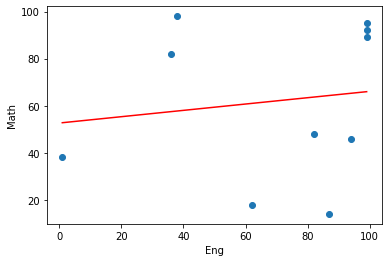

In [29]:
# 第3引数は多項式の次数
poly_fit = np.polyfit(en_scores, ma_scores, 1)
# 係数から1次関数を作成
poly_1d = np.poly1d(poly_fit)
# 最小値から最大値の間に等間隔で50個の数値を作成
xs = np.linspace(en_scores.min(), en_scores.max())
# xsに対応するy座標を計算
ys = poly_1d(xs)

plt.xlabel('Eng')
plt.ylabel('Math')
plt.scatter(en_scores, ma_scores)
plt.plot(xs, ys, color='red')

### ヒートマップ

ヒートマップはヒストグラムの2次元版で、各区画の頻度を色の濃さで表現したものである。

ヒートマップの表示はhist2dを用いる。


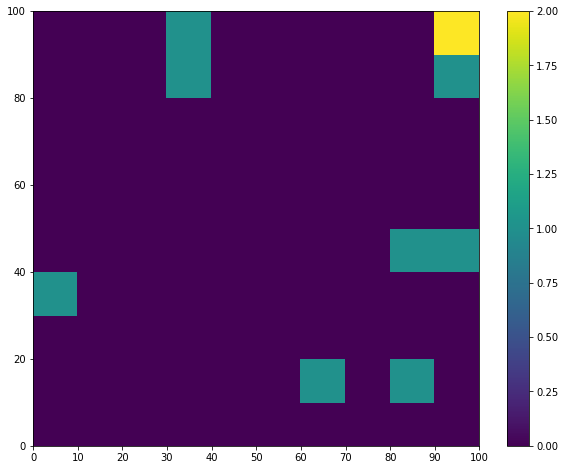

In [30]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.hist2d(en_scores, ma_scores, bins=[10,10], range=[(0,100),(0,100)])
ax.set_xticks(c[1])
ax.set_xticks(c[2])
fig.colorbar(c[3], ax=ax)

# 推測統計の基本

ここまでは得られたデータを分析する記述統計。ここからは得られたデータから母集団の性質を推定する推測統計。

推測統計では確率が重要な道具となる。それは推測統計においては、得られたデータ（標本）は、観測対象全体（母集団）から確率的に得られたものと仮定し、その上で母集団の分布を推測することを行っているからである。

推測統計はさらに推定と検定に分けられる。

推定は標本から母集団のもつパラメータ（母数）を推定するものである。検定はある仮説が正しいかどうかを統計的に判断するものである。

推定で行っていること

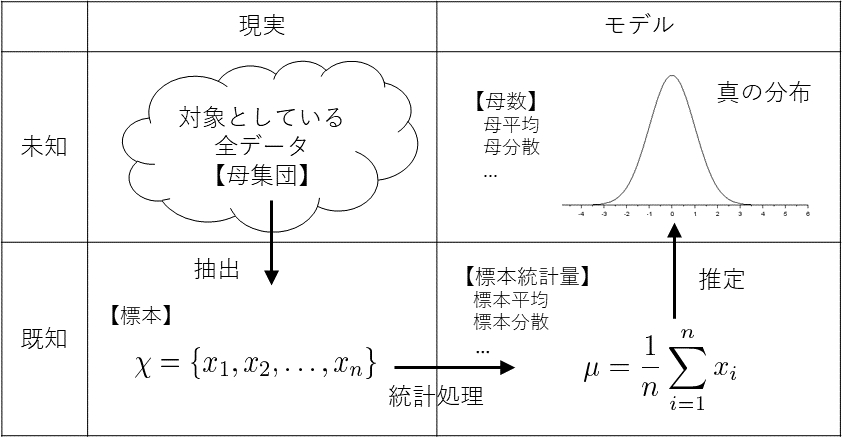

例題：全校生徒300人が同じテストを受けた。平均点などは公開されていないが、ある生徒が自分のテストのできを調べるため、ランダムに20人を選んで点数を聞き、平均点を推測した。

In [33]:
# 300人分のテストのデータの生成
all_scores = np.random.randint(0,100,300)

## 母集団と標本

### 標本の抽出方法

複数回同じ標本を選ぶ可能性がある方法を復元抽出、同じ標本は一度しか選ばない方法を非復元抽出とよぶ。一度抽出した標本を母集団に戻すかどうかという基準。

In [34]:
# 復元抽出
np.random.choice([1,2,3], 3)

array([3, 1, 2])

In [35]:
# 非復元抽出
np.random.choice([1,2,3], 3, replace=False)

array([3, 1, 2])

In [36]:
# 20人分のテストのデータを非復元抽出
samples = np.random.choice(all_scores, 20, replace=False)

母集団の平均と標本の平均の比較

標本数を変えて差を比較してみよ。

In [38]:
all_scores.mean(), samples.mean()

(50.037, 48.200)

## 確率変数

とりうる値とその値がでる確率が与えられている変数を確率変数とよぶ。確率変数の振る舞いを示すものを確率分布とよぶ。

### 離散型確率変数

とりうる値が離散値である確率変数を離散型確率変数とよぶ。1次元の離散型確率変数の例としてはサイコロの目がある。この確率変数がある値をとる確率を関数の形で表したものが確率質量関数である。

確率変数を2つ組み合わせた2次元の場合は、同時確率を考えることになる。同時確率が得られたとき、片方の確率変数のとりうる値を同時確率関数に代入して足し合わせることを周辺化とよび、そのようにして得られたもうひとつの確率変数の分布を周辺分布とよぶ。

### 離散確率分布

ベルヌーイ分布

とりうる値が0または1の2種類しかないときの確率分布。1が出る確率pが分布のパラメータとなり、0が出る確率は1-pとなる。ベルヌーイ分布の期待値はp、分散はp(1-p)となる。

$$
f(x) = 
\begin{cases}
p^x (1-p)^{(1-x)} ~~ (x \in \{0,1\})\\
0 ~~~~~~~~~~~~~~~~~~~ (otherwise)
\end{cases}
$$

scipy.stats以下にはさまざまな分布関数が用意されている。

In [ ]:
from scipy import stats

In [ ]:
rv = stats.bernoulli(0.7)

In [ ]:
# 確率質量関数の計算はpmfメソッドを用いる。引数は確率変数の値
rv.pmf(0), rv.pmf(1)

(0.300, 0.700)

二項分布

ベルヌーイ試行をn回行ったときの1のでる回数が従う分布。とりうる値は0からnとなる。分布のパラメータはnとpであり、期待値はnp、分散はnp(1-p)である。

$$
f(x) = 
\begin{cases}
{}_n \mathrm{C}_x p^x (1-p)^{(n-x)} ~~ (x \in \{0,1,\dots,n\})\\
0 ~~~~~~~~~~~~~~~~~~~ (otherwise)
\end{cases}
$$

<BarContainer object of 12 artists>

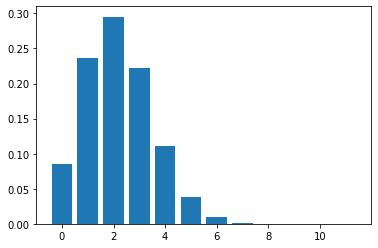

In [ ]:
rv = stats.binom(11, 0.2)
linenum = range(0,12)
plt.bar(linenum, rv.pmf(linenum))

幾何分布

ベルヌーイ試行が初めて成功するまでの試行回数の分布。とりうる値は整数全体。パラメータはp。期待値は$1/p$、分散は$(1-p)/p^2$。

$$
f(x) = 
\begin{cases}
(1-p)^{(x-1)}p ~~ (x \in \{1,2,3,\dots\})\\
0 ~~~~~~~~~~~~~~~~~~~ (otherwise)
\end{cases}
$$

<BarContainer object of 20 artists>

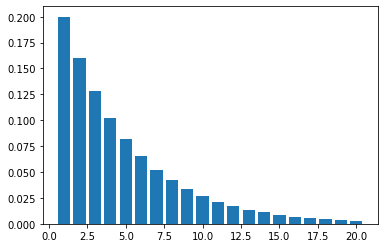

In [ ]:
rv = stats.geom(0.2)
linenum = range(1,21)
plt.bar(linenum, rv.pmf(linenum))

ポアソン分布

ランダムな事象が単位時間あたりに発生する件数の分布。とりうる値は0と整数全体。パラメータは$\lambda$。期待値、分散とも$\lambda$。

ポアソン分布は二項分布の極限。詳細は[高校数学の美しい物語「ポアソン分布の意味と平均・分散」](https://manabitimes.jp/math/924)を参照。

$$
f(x) = 
\begin{cases}
\frac{\lambda^x}{x!} e^{-\lambda} ~~ (x \in \{0,1,2,\dots\})\\
0 ~~~~~~~~~~~~~~~~~~~ (otherwise)
\end{cases}
$$

<BarContainer object of 11 artists>

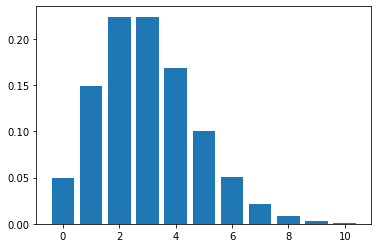

In [ ]:
rv = stats.poisson(3)
linenum = range(0,11)
plt.bar(linenum, rv.pmf(linenum))

## 連続確率分布

連続値を値とする確率分布は確率密度関数で表す。連続値の場合は、特定の値をとる確率は0なので、区間を指定して積分で確率を表す。

分布の計算をしやすくするために、値がある値以下になる確率を累積分布関数(CDF)とよび、特定の区間の確率はこのCDFの差で求めることができる。

正規分布

自然界の多くの現象が従う分布。パラメータは平均と分散。

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\{-\frac{(x - \mu)^2}{2\sigma^2}\} ~~~(-\infty < x < \infty)
$$

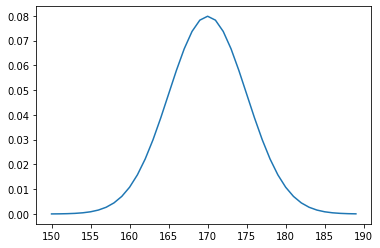

In [ ]:
# 平均身長が170cm、標準偏差が5cmと仮定したときの正規分布
rv = stats.norm(170, 5)
linenum = range(150,190)
plt.plot(linenum, rv.pdf(linenum))

In [ ]:
# 160cmから180cmの人に出会う確率
rv.cdf(180)-rv.cdf(160)

0.954

指数分布

ある事象が発生する間隔が従う分布。パラメータは単位時間あたりの事象の平均発生回数$\lambda$。期待値は$1/\lambda$、分散は$1/\lambda^2$。

$$
f(x) = 
\begin{cases}
\lambda e^{-\lambda x} ~~ (x \geq 0)\\
0 ~~~~~~~~~~ (otherwise)
\end{cases}
$$

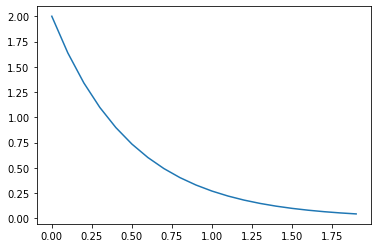

In [ ]:
rv = stats.expon(scale=1/3)
linenum = np.arange(0,2,0.1)
plt.plot(linenum, rv.pdf(linenum))

In [ ]:
# 平均して1日3件交通事故が発生する地域で、2日以内に事故が発生する確率
rv.cdf(2)

0.982

# 統計的推定

母集団の分布に何の制約も設けない場合は、標本から分布を推定することは難しい。そこで、母集団の確率モデルとして特定の分布を仮定し、そのパラメータを標本統計量から求める方法がよく用いられる。この方法を**パラメトリックな方法**とよぶ。一方、分布を仮定しない方法を**ノンパラメトリックな方法**とよぶ。

また、分布の推定において、特定のパラメータを推定する方法を**点推定**とよび、幅を持って推定する方法を**区間推定**とよぶ。次回以降説明する機械学習ではデータにうまく適合するモデルのパラメータを求めることになるので、点推定を行うことが多い。